# **Environment Setup**

In [1]:
# datasets to be used: "Universities.csv"
# upload datasets to a folder in Google Drive, e.g., My Drive/Colab Data
# connect to Google Drive, path to datasets is "/content/drive/My Drive/Colab Data/..."
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
## (if running in Colab you can skip this part)
## install required packages if not already in the environment
# pip install -U scikit-learn

In [3]:
datapath = '../data/'

In [4]:
# import required packages
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns

## **Task 1:** Data cleaning (without scaling yet)

Objective: PCA only works on metric variables. So we need to remove non-metric variables and also any missing entries

In [5]:
# load the data and review
uni_df = pd.read_csv(datapath + '/Universities.csv')
uni_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [6]:
# shape of dataframe 
uni_df.shape

(1302, 20)

In [7]:
# concise summary containing variable types
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

Notice: columns 0, 1 and 2 contain non-metric variables so we should drop them. Also, several variables have many missing entries, meaning, universities did not report the data! We need to fix both issues...

In [8]:
# first create a list of all the columns to be dropped
cols = ['College Name','State','Public (1)/ Private (2)']
# then use the dataframe drop() command to drop them
uni_mdf = uni_df.drop(cols, axis =1)
uni_mdf.head()

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [9]:
#check the resulting shape
print(uni_mdf.shape)

(1302, 17)


In [10]:
# next, drop missing values
# option "any" drops any line that has even a single missing value
# option "all" drops the row only if all columns of that row have missing entries
uni_mdf = uni_mdf.dropna(how='any')
# it's good practice to reset the index after dropping empty rows...
# the option drop=True removes useless information that the rest_index adds
uni_mdf = uni_mdf.reset_index(drop=True)
uni_mdf

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
3,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
4,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,2208.0,6996.0,1565.0,1140.0,1070.0,279.0,1260.0,80.0,19.3,61.0
467,152.0,128.0,75.0,17.0,41.0,282.0,22.0,9100.0,9100.0,1800.0,1900.0,90.0,500.0,1400.0,48.0,8.5,50.0
468,582.0,498.0,172.0,21.0,44.0,799.0,78.0,10468.0,10468.0,1574.0,1806.0,92.0,660.0,1800.0,40.0,11.5,52.0
469,4226.0,3666.0,2007.0,14.0,60.0,7703.0,2339.0,1660.0,5094.0,2030.0,1980.0,330.0,700.0,1560.0,77.0,16.6,50.0


Only 471 observations made it through pre-processing out of 1302 initially!

## **Task 2:** Let's now try to check whether there are any correlations between the columns

In [11]:
# correlation table for the quantitative variables
# the corr() method creates a new dataframe containing the correlation matrix
corr_mat = uni_mdf.corr()
corr_mat

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
# appli. rec'd,1.000000,0.935770,0.819857,0.298749,0.325391,0.795643,0.412259,-0.118912,0.075774,0.232367,0.125895,0.299770,0.105389,0.178013,0.377163,0.077846,0.182058
# appl. accepted,0.935770,1.000000,0.895155,0.136035,0.201216,0.864748,0.470371,-0.202329,-0.005668,0.170734,0.053769,0.292556,0.071003,0.205665,0.343457,0.164037,0.098350
# new stud. enrolled,0.819857,0.895155,1.000000,0.138461,0.179462,0.968643,0.558167,-0.335632,-0.139695,0.019735,-0.034223,0.283604,0.061411,0.295832,0.320065,0.225909,0.012737
% new stud. from top 10%,0.298749,0.136035,0.138461,1.000000,0.906129,0.102562,-0.126367,0.553145,0.625991,0.343577,0.375795,0.026392,0.116046,-0.130457,0.545600,-0.460256,0.558186
% new stud. from top 25%,0.325391,0.201216,0.179462,0.906129,1.000000,0.155569,-0.097473,0.499012,0.576582,0.324089,0.359908,0.015944,0.124989,-0.123673,0.563439,-0.370763,0.575379
# FT undergrad,0.795643,0.864748,0.968643,0.102562,0.155569,1.000000,0.592776,-0.386847,-0.184727,0.008577,-0.055043,0.249330,0.070380,0.337147,0.313091,0.256107,-0.042209
# PT undergrad,0.412259,0.470371,0.558167,-0.126367,-0.097473,0.592776,1.000000,-0.341228,-0.220836,-0.025101,-0.015629,0.089498,0.080401,0.291897,0.138053,0.194537,-0.235267
in-state tuition,-0.118912,-0.202329,-0.335632,0.553145,0.499012,-0.386847,-0.341228,1.000000,0.937382,0.490391,0.582410,-0.219205,0.055218,-0.349198,0.288653,-0.604224,0.579677
out-of-state tuition,0.075774,-0.005668,-0.139695,0.625991,0.576582,-0.184727,-0.220836,0.937382,1.000000,0.557741,0.606638,-0.097724,0.067404,-0.320028,0.458300,-0.596022,0.621332
room,0.232367,0.170734,0.019735,0.343577,0.324089,0.008577,-0.025101,0.490391,0.557741,1.000000,0.482551,0.091968,0.192907,-0.177831,0.321535,-0.345376,0.369564


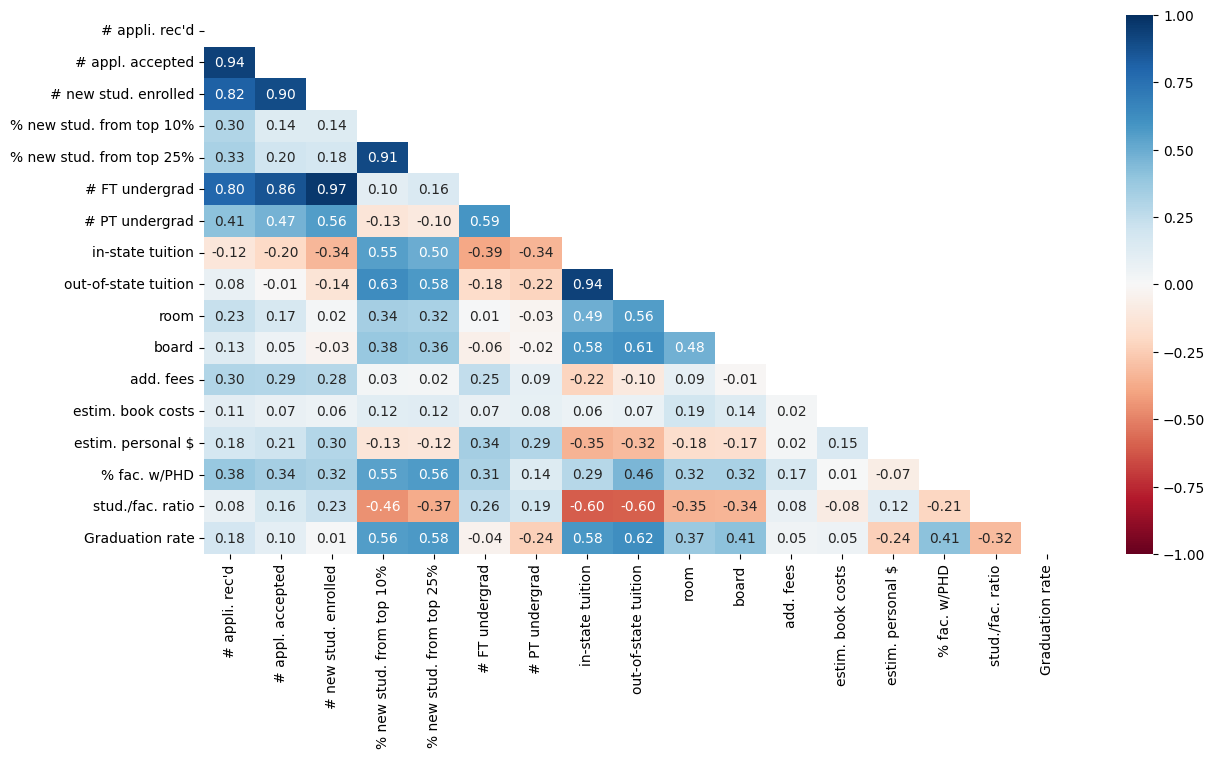

In [16]:
# easier to interpret using a heatmap with colormap, from the seaborn package
# list of available color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize=(14,7))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, annot=True,  mask=mask, fmt=".2f",vmin=-1,vmax=1, cmap='RdBu');

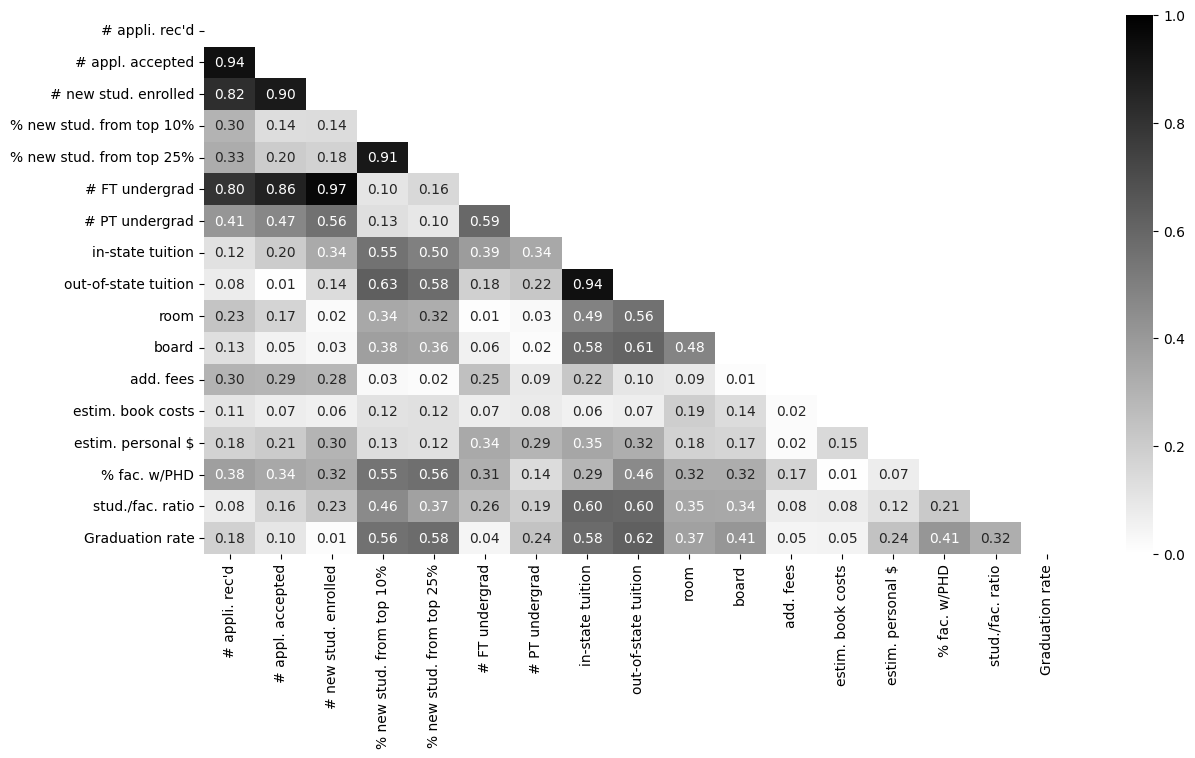

In [17]:
# if we only care about the magnitude of corr but not the sign then better to use grayscale
plt.figure(figsize=(14,7))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(np.absolute(corr_mat), annot=True, mask=mask, fmt=".2f", vmin=0, vmax=1, cmap="gray_r");

## **Task 3:** Run PCA (skipping preprocessing data scaling step - for instructional purposes only, don't skip this step in practice!)

In [18]:
# Run PCA on unstandardized data
# PCA will create an object called a 'class', i.e., an instance
pcs = PCA()

# Then we use the "fit" function to run the PCA on a specific dataframe
# It will run the model in the background but won't show you anything...
pcs.fit(uni_mdf)

PCA()

Now that the PCA is done, we need to call additional internal functions to visualize the actual output. Let's start by visualizing the % of variance explained by each component

In [19]:
# to view the variance explained, we need to use the explained_variance_ratio_ method
print(pcs.explained_variance_ratio_.round(3))
# use the cumulative sum function to keep track of total variance explained
print(np.cumsum(pcs.explained_variance_ratio_).round(3))

[0.561 0.365 0.035 0.014 0.01  0.005 0.004 0.003 0.002 0.001 0.    0.
 0.    0.    0.    0.    0.   ]
[0.561 0.926 0.961 0.975 0.985 0.99  0.993 0.997 0.998 0.999 1.    1.
 1.    1.    1.    1.    1.   ]


The output isn't very easy for us to read, let's make it nicer...

In [20]:
# we are going to create a new dataframe to store the output
pcsSummary_df = pd.DataFrame({
            '% of variance explained': pcs.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcsSummary_df.round(3)

,% of variance explained,Cumulative % explained
0,0.561,0.561
1,0.365,0.926
2,0.035,0.961
3,0.014,0.975
4,0.010,0.985
5,0.005,0.990
6,0.004,0.993
7,0.003,0.997
8,0.002,0.998
9,0.001,0.999


The first component, alone, seems to explain 56% of the variance in the data! (compressed down from 17 dimensions!). Too good to be true?

Next, let's look at the components, and their correlation with the original data...

In [21]:
# components_ method puts the components on the rows, and the variables on the columns 
# This is the opposite of the format we have in our slides, so we will need to transpose
# use "index" argument in dataframe to add the names of the variables to component matrix
var = list(uni_mdf.columns)
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
# appli. rec'd,0.27,0.55,0.66,0.13,-0.03,0.37,-0.12,-0.10,-0.04,-0.01,-0.02,-0.01,0.01,0.00,-0.00,-0.00,-0.00
# appl. accepted,0.19,0.32,0.19,-0.01,-0.08,-0.81,0.35,0.10,0.08,-0.04,0.10,0.02,-0.01,-0.00,0.00,0.00,0.00
# new stud. enrolled,0.08,0.10,-0.09,-0.06,-0.04,-0.08,0.02,-0.04,0.03,0.17,-0.97,-0.01,0.01,-0.00,-0.01,-0.01,-0.00
% new stud. from top 10%,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.01,0.00,-0.51,-0.25,0.23,0.78,0.11
% new stud. from top 25%,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.01,0.01,-0.69,-0.23,0.32,-0.61,-0.05
# FT undergrad,0.46,0.49,-0.64,-0.28,-0.08,0.13,-0.13,0.01,-0.02,-0.01,0.15,-0.00,0.00,0.00,0.00,0.00,-0.00
# PT undergrad,0.11,0.07,-0.29,0.94,-0.05,-0.04,-0.02,-0.07,-0.04,0.03,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
in-state tuition,-0.67,0.38,-0.08,-0.02,-0.62,0.00,-0.06,0.01,-0.04,0.07,0.02,-0.00,0.00,-0.00,-0.00,-0.00,0.00
out-of-state tuition,-0.45,0.43,-0.13,0.02,0.75,0.01,0.14,-0.09,-0.00,-0.06,-0.02,0.01,0.00,-0.00,0.00,-0.00,0.00
room,-0.03,0.06,0.04,0.07,0.12,-0.05,-0.31,0.87,-0.32,-0.05,-0.07,-0.05,-0.00,-0.00,0.00,-0.00,0.00


We haven't scaled the data... and as you can see, we are running into some issues. For instance, #FT undergrad seems to be highly correlated with factors 0, 1 and 2 at the same time. The same can be said for some of the other variables. This is a sign that the results are indeed too good to be true.

**Let's try data scaling!**

## **Task 4:** Scale the data and rerun PCA

In [22]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function
pcs = PCA()
pcs.fit(preprocessing.scale(uni_mdf))

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.304,0.304
1,0.270,0.574
2,0.071,0.645
3,0.063,0.708
4,0.056,0.764
5,0.045,0.809
6,0.038,0.847
7,0.035,0.882
8,0.029,0.911
9,0.026,0.937


The first 4 components (labeled 0 to 3) explain 71% of the total variance. The first component now explains only 30% of the variance in the data, vs 56% in the unscaled version! Still impressive considering we are compressing from 17 dimensions...

In [23]:
# Component matrix (correlations)
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
# appli. rec'd,0.08,0.42,-0.03,0.07,-0.02,0.11,-0.27,-0.09,0.04,-0.09,-0.07,-0.01,0.60,0.20,0.35,-0.34,-0.25
# appl. accepted,0.02,0.43,-0.03,0.12,-0.09,0.11,-0.27,-0.08,0.02,0.04,-0.17,-0.06,0.25,-0.24,-0.45,0.43,0.39
# new stud. enrolled,-0.03,0.45,-0.04,-0.03,-0.08,0.05,-0.10,-0.06,0.10,0.02,-0.07,0.01,-0.49,0.06,-0.32,-0.01,-0.65
% new stud. from top 10%,0.35,0.09,-0.12,-0.37,0.16,-0.00,0.10,-0.11,0.03,-0.33,0.21,-0.04,-0.00,0.65,-0.19,0.17,0.17
% new stud. from top 25%,0.34,0.12,-0.14,-0.39,0.16,0.09,0.14,-0.04,-0.01,-0.31,0.23,0.01,0.04,-0.69,0.09,-0.06,-0.11
# FT undergrad,-0.05,0.44,-0.00,-0.06,-0.09,0.04,-0.04,-0.04,0.03,-0.01,-0.06,0.05,-0.51,0.01,0.44,-0.22,0.52
# PT undergrad,-0.11,0.29,0.27,0.05,-0.34,-0.19,0.51,-0.12,0.17,0.23,0.53,-0.11,0.17,-0.01,-0.04,0.01,0.00
in-state tuition,0.38,-0.15,0.08,0.04,-0.17,-0.00,-0.13,0.01,0.09,0.10,-0.04,-0.50,-0.07,-0.04,-0.36,-0.59,0.16
out-of-state tuition,0.40,-0.05,0.05,0.08,-0.16,-0.04,-0.08,-0.01,0.04,0.15,-0.10,-0.51,-0.10,0.01,0.45,0.51,-0.18
room,0.27,0.05,0.25,0.45,-0.00,-0.02,-0.12,-0.09,-0.68,-0.18,0.31,0.15,-0.12,0.00,-0.03,-0.01,-0.02


The 1st component appears to capture something about quality (e.g. student and faculty quality) and expenses (tuition, room, board). The 2nd component is related to the popularity of the program (as reflected by # application received, accepted, # new enrolled students, and # FT undergraduates). The 3rd component is mainly estimated book and personal costs, and the 4th contrasts room & board costs with student quality (% new students from top 10% and top 25%).

## **Task 5:** Let's now try to figure out how many components we need...

In [24]:
#Eigenvalues are given by the PCA explained_variance_ method
eig=pcs.explained_variance_.round(2)
print(eig)

[5.19 4.6  1.21 1.07 0.95 0.76 0.65 0.6  0.5  0.44 0.4  0.3  0.19 0.09
 0.04 0.03 0.02]


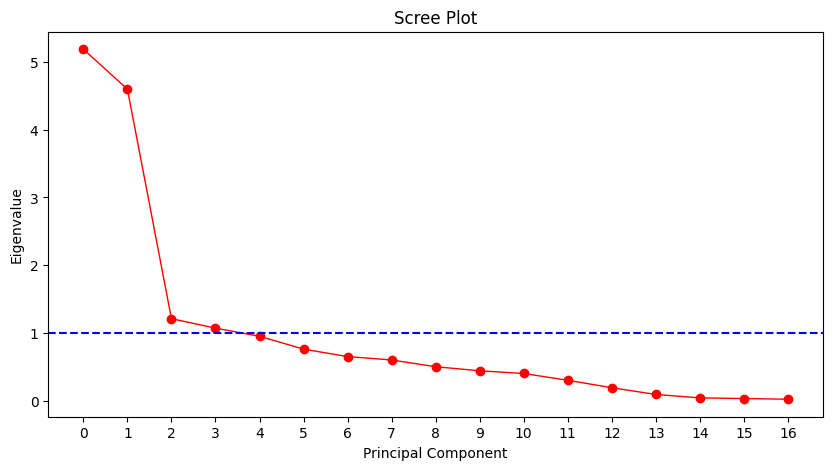

In [25]:
# scree plot of eigenvalues
# define the x values, i.e., components
xvals = np.arange(uni_mdf.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

The latent root criterion suggests keeping the first 4 components.

**Conclusion:** We have taken a 17-dimensional dataset and reduced it down to 4 core components!

## **Bonus task:** Keep the first 4 components and merge them into a dataframe, to then run other models, like linear regression, etc.

For this, we're going to need to extract the actual PCA values for each component (also called component scores). These values represent the linear combinations of the original data values.

In [26]:
# Keeping the first 4 components based on latent root criterion
# fit() function runs the PCA and shows the % of var explained
# fit_transform() function runs the PCA and shows the actual PCA values (the components score)
pcs = PCA(n_components=4)
principalComponents = pcs.fit_transform(preprocessing.scale(uni_mdf))

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        data = principalComponents.round(2), 
        columns = ['F1','F2','F3','F4']
        )

principalDF

,F1,F2,F3,F4
0,-1.55,-1.45,2.01,-0.39
1,-2.59,-1.87,1.45,0.86
2,1.83,-1.00,-1.13,-1.45
3,-0.90,-1.73,0.20,-0.47
4,-1.69,-0.43,1.35,-1.03
...,...,...,...,...
466,-2.32,2.37,-2.65,0.34
467,-1.16,-2.19,0.62,-0.45
468,-1.27,-1.87,1.29,-0.89
469,-1.95,2.06,0.70,-0.28


In [27]:
# confirm component scores are orthogonal (small correlations)
principalDF.corr().round(4)

,F1,F2,F3,F4
F1,1.0000,0.0000,-0.0001,0.0001
F2,0.0000,1.0000,-0.0000,0.0001
F3,-0.0001,-0.0000,1.0000,-0.0002
F4,0.0001,0.0001,-0.0002,1.0000


In [28]:
# merge component scores with the original dataframe (after missing values are dropped)
# we will use the concatenate, concat() function
uni_df_aug = pd.concat([uni_df.dropna(subset=uni_mdf.columns, how='any').reset_index(drop=True), principalDF], axis=1)
uni_df_aug

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,...,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,F1,F2,F3,F4
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,...,130.0,800.0,1500.0,76.0,11.9,15.0,-1.55,-1.45,2.01,-0.39
1,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,...,34.0,500.0,1162.0,39.0,9.5,39.0,-2.59,-1.87,1.45,0.86
2,Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,...,120.0,400.0,900.0,74.0,14.0,72.0,1.83,-1.00,-1.13,-1.45
3,Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,...,100.0,500.0,1100.0,63.0,11.4,44.0,-0.90,-1.73,0.20,-0.47
4,Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,...,418.0,1000.0,1400.0,56.0,15.5,46.0,-1.69,-0.43,1.35,-1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Univ. of Wisconsin at Eau Claire,WI,1,5729.0,4520.0,1957.0,20.0,52.0,8516.0,1264.0,...,1070.0,279.0,1260.0,80.0,19.3,61.0,-2.32,2.37,-2.65,0.34
467,Wisconsin Lutheran College,WI,2,152.0,128.0,75.0,17.0,41.0,282.0,22.0,...,90.0,500.0,1400.0,48.0,8.5,50.0,-1.16,-2.19,0.62,-0.45
468,Alderson-Broaddus College,WV,2,582.0,498.0,172.0,21.0,44.0,799.0,78.0,...,92.0,660.0,1800.0,40.0,11.5,52.0,-1.27,-1.87,1.29,-0.89
469,Marshall University,WV,2,4226.0,3666.0,2007.0,14.0,60.0,7703.0,2339.0,...,330.0,700.0,1560.0,77.0,16.6,50.0,-1.95,2.06,0.70,-0.28
